In [4]:
import pandas as pd
import glob
from autogluon.tabular import TabularPredictor
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuration
total_time_seconds = 1 * 60
num_experiments = 6
time_limit_seconds = total_time_seconds / num_experiments

# Get list of all datasets
dataset_dir = "04_datasets/hpa_7c"
datasets = glob.glob(os.path.join(dataset_dir, "*.feather"))
print(f"Found {len(datasets)} datasets in {dataset_dir}")
print(datasets)


Found 6 datasets in 04_datasets/hpa_7c
['04_datasets/hpa_7c/CPU.feather', '04_datasets/hpa_7c/Network.feather', '04_datasets/hpa_7c/Other.feather', '04_datasets/hpa_7c/Kepler.feather', '04_datasets/hpa_7c/Memory.feather', '04_datasets/hpa_7c/Disk_io.feather']


In [8]:
# Function to process a single dataset
def process_dataset(file_path, time_limit):
    combined_df = pd.read_feather(file_path)
    combined_df = combined_df.dropna()  # Drop nans - TODO: Should check for malformed datasets here?

    dataset_name = os.path.basename(file_path)

    if len(combined_df.columns) > 1:
        label_column = "target"
        predictor = TabularPredictor(label=label_column).fit(combined_df, time_limit=time_limit)

        performance = predictor.leaderboard(silent=True)['score_val'][0]
        feature_importances = predictor.feature_importance(combined_df).head(5)
        # feature_importances = None

        return {
            "dataset": dataset_name,
            "performance": performance,
            "model_summary": predictor.fit_summary(),
            "top_features": feature_importances.index.tolist(),
            "feature_importance": feature_importances['importance'].values
        }
    else:
        return {
            "dataset": dataset_name,
            "error": "No data to train on"
        }


# Initialize the results dictionary
results = {}

# Process all datasets
for dataset in datasets:
    results[dataset] = process_dataset(dataset, time_limit_seconds)




No path specified. Models will be saved in: "AutogluonModels/ag-20250327_114108"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #53~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Wed Jan 15 19:18:46 UTC 2
CPU Count:          16
Memory Avail:       20.82 GB / 31.02 GB (67.1%)
Disk Space Avail:   84.07 GB / 913.75 GB (9.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in 

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2     0.9560    accuracy       0.456709  9.350206                0.000891           0.089501            2       True          5
1       KNeighborsDist     0.9468    accuracy       0.219328  0.125882                0.219328           0.125882            1       True          2
2      NeuralNetFastAI     0.3644    accuracy       0.016780  7.936949                0.016780           7.936949            1       True          3
3           LightGBMXT     0.2420    accuracy       0.005283  1.070427                0.005283           1.070427            1       True          4
4       KNeighborsUnif     0.1328    accuracy       0.214427  0.127446                0.214427           0.127446            1       True          1
Number of models trained: 5
Types of models 

	Types of features in original data (raw dtype, special dtypes):
		('float', []) : 24 | ['{"__name__": "node_netstat_Tcp_ActiveOpens_rate", "instance": "worker"}', '{"__name__": "node_netstat_Udp6_InDatagrams_rate", "instance": "worker"}', '{"__name__": "instance:node_network_receive_drop_excluding_lo:rate5m", "instance": "worker"}', '{"__name__": "node_netstat_Ip6_OutOctets_rate", "instance": "worker"}', '{"__name__": "node_netstat_Tcp_OutSegs_rate", "instance": "worker"}', ...]
		('int', [])   :  1 | ['{"__name__": "node_netstat_Tcp_CurrEstab", "instance": "worker"}']
	Types of features in processed data (raw dtype, special dtypes):
		('float', []) : 24 | ['{"__name__": "node_netstat_Tcp_ActiveOpens_rate", "instance": "worker"}', '{"__name__": "node_netstat_Udp6_InDatagrams_rate", "instance": "worker"}', '{"__name__": "instance:node_network_receive_drop_excluding_lo:rate5m", "instance": "worker"}', '{"__name__": "node_netstat_Ip6_OutOctets_rate", "instance": "worker"}', '{"__name__":

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2     0.7144    accuracy       0.165060  9.607909                0.000880           0.097245            2       True          5
1       KNeighborsDist     0.6592    accuracy       0.146596  0.077368                0.146596           0.077368            1       True          2
2       KNeighborsUnif     0.3904    accuracy       0.153481  0.080257                0.153481           0.080257            1       True          1
3      NeuralNetFastAI     0.3496    accuracy       0.015830  8.801860                0.015830           8.801860            1       True          3
4           LightGBMXT     0.2380    accuracy       0.001754  0.631436                0.001754           0.631436            1       True          4
Number of models trained: 5
Types of models 

	0.3112	 = Validation score   (accuracy)
	0.21s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: KNeighborsDist ... Training model for up to 9.64s of the 9.64s of remaining time.
	0.7296	 = Validation score   (accuracy)
	0.21s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 9.38s of the 9.38s of remaining time.
	0.5412	 = Validation score   (accuracy)
	5.98s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBMXT ... Training model for up to 3.37s of the 3.37s of remaining time.
	Ran out of time, early stopping on iteration 33. Best iteration is:
	[33]	valid_set's multi_error: 0.5108
	0.4892	 = Validation score   (accuracy)
	3.43s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 9.90s of the -0.15s of remaining time.
	Ensemble Weights: {'KNeighborsDist': 0.364, 'NeuralNetFastAI': 0.364, 'LightGBMXT': 0.273}
	0.8276	 = Val

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2     0.8276    accuracy       0.102485  9.714309                0.000873           0.087703            2       True          5
1       KNeighborsDist     0.7296    accuracy       0.039917  0.207898                0.039917           0.207898            1       True          2
2      NeuralNetFastAI     0.5412    accuracy       0.015272  5.984825                0.015272           5.984825            1       True          3
3           LightGBMXT     0.4892    accuracy       0.046424  3.433884                0.046424           3.433884            1       True          4
4       KNeighborsUnif     0.3112    accuracy       0.039569  0.209684                0.039569           0.209684            1       True          1
Number of models trained: 5
Types of models 

	0.55	 = Validation score   (accuracy)
	0.17s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: KNeighborsDist ... Training model for up to 9.68s of the 9.68s of remaining time.
	0.7212	 = Validation score   (accuracy)
	0.17s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 9.48s of the 9.48s of remaining time.
	Ran out of time, stopping training early. (Stopping on epoch 6)
	0.2704	 = Validation score   (accuracy)
	8.52s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBMXT ... Training model for up to 0.93s of the 0.93s of remaining time.
	Ran out of time, early stopping on iteration 11. Best iteration is:
	[11]	valid_set's multi_error: 0.7592
	0.2408	 = Validation score   (accuracy)
	0.95s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 9.89s of the -0.04s of remaining time.
	Ensemble Weights: {'LightGBMXT': 0.417, 'K

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2     0.7456    accuracy       0.053401  9.722550                0.000862           0.089288            2       True          5
1       KNeighborsDist     0.7212    accuracy       0.027380  0.169052                0.027380           0.169052            1       True          2
2       KNeighborsUnif     0.5500    accuracy       0.028614  0.172860                0.028614           0.172860            1       True          1
3      NeuralNetFastAI     0.2704    accuracy       0.015315  8.516589                0.015315           8.516589            1       True          3
4           LightGBMXT     0.2408    accuracy       0.009844  0.947622                0.009844           0.947622            1       True          4
Number of models trained: 5
Types of models 

	0.6364	 = Validation score   (accuracy)
	0.21s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: KNeighborsDist ... Training model for up to 9.52s of the 9.52s of remaining time.
	0.6912	 = Validation score   (accuracy)
	0.22s	 = Training   runtime
	0.18s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 9.11s of the 9.11s of remaining time.
	0.288	 = Validation score   (accuracy)
	5.3s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBMXT ... Training model for up to 3.78s of the 3.78s of remaining time.
	Ran out of time, early stopping on iteration 53. Best iteration is:
	[53]	valid_set's multi_error: 0.7116
	0.2884	 = Validation score   (accuracy)
	3.87s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 9.91s of the -0.21s of remaining time.
	Ensemble Weights: {'NeuralNetFastAI': 0.556, 'KNeighborsDist': 0.278, 'LightGBMXT': 0.111, 'KNeighborsUnif'

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2     0.7448    accuracy       0.427796  9.696015                0.000889           0.090817            2       True          5
1       KNeighborsDist     0.6912    accuracy       0.179318  0.216341                0.179318           0.216341            1       True          2
2       KNeighborsUnif     0.6364    accuracy       0.168403  0.213244                0.168403           0.213244            1       True          1
3           LightGBMXT     0.2884    accuracy       0.063531  3.874438                0.063531           3.874438            1       True          4
4      NeuralNetFastAI     0.2880    accuracy       0.015655  5.301174                0.015655           5.301174            1       True          3
Number of models trained: 5
Types of models 

/tmp/ipykernel_23625/3474637658.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Dataset", y="Performance", palette="viridis")


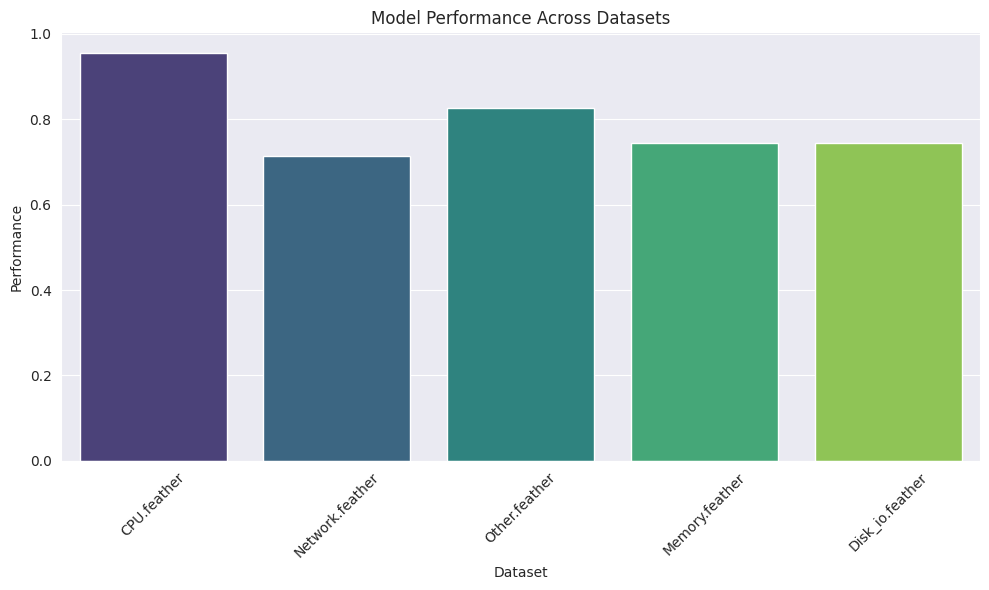

['{"__name__": "node_cpu_scaling_frequency_hertz", "cpu": "3", "instance": "worker"}', '{"__name__": "node_cpu_scaling_frequency_hertz", "cpu": "1", "instance": "worker"}', '{"__name__": "node_cpu_scaling_frequency_hertz", "cpu": "2", "instance": "worker"}', '{"__name__": "node_cpu_scaling_frequency_hertz", "cpu": "0", "instance": "worker"}', '{"__name__": "node_softnet_processed_rate", "cpu": "0", "instance": "worker"}']
['{"__name__": "instance:node_network_transmit_bytes:rate:sum", "instance": "worker"}', '{"__name__": "instance:node_network_transmit_bytes_excluding_lo:rate5m", "instance": "worker"}', '{"__name__": "instance:node_network_receive_bytes_excluding_lo:rate5m", "instance": "worker"}', '{"__name__": "instance:node_network_receive_bytes:rate:sum", "instance": "worker"}', '{"__name__": "node_netstat_IpExt_OutOctets_rate", "instance": "worker"}']
['{"__name__": "node_filefd_allocated", "instance": "worker"}', '{"__name__": "node_thermal_zone_temp", "instance": "worker", "typ

/tmp/ipykernel_23625/3474637658.py:30: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


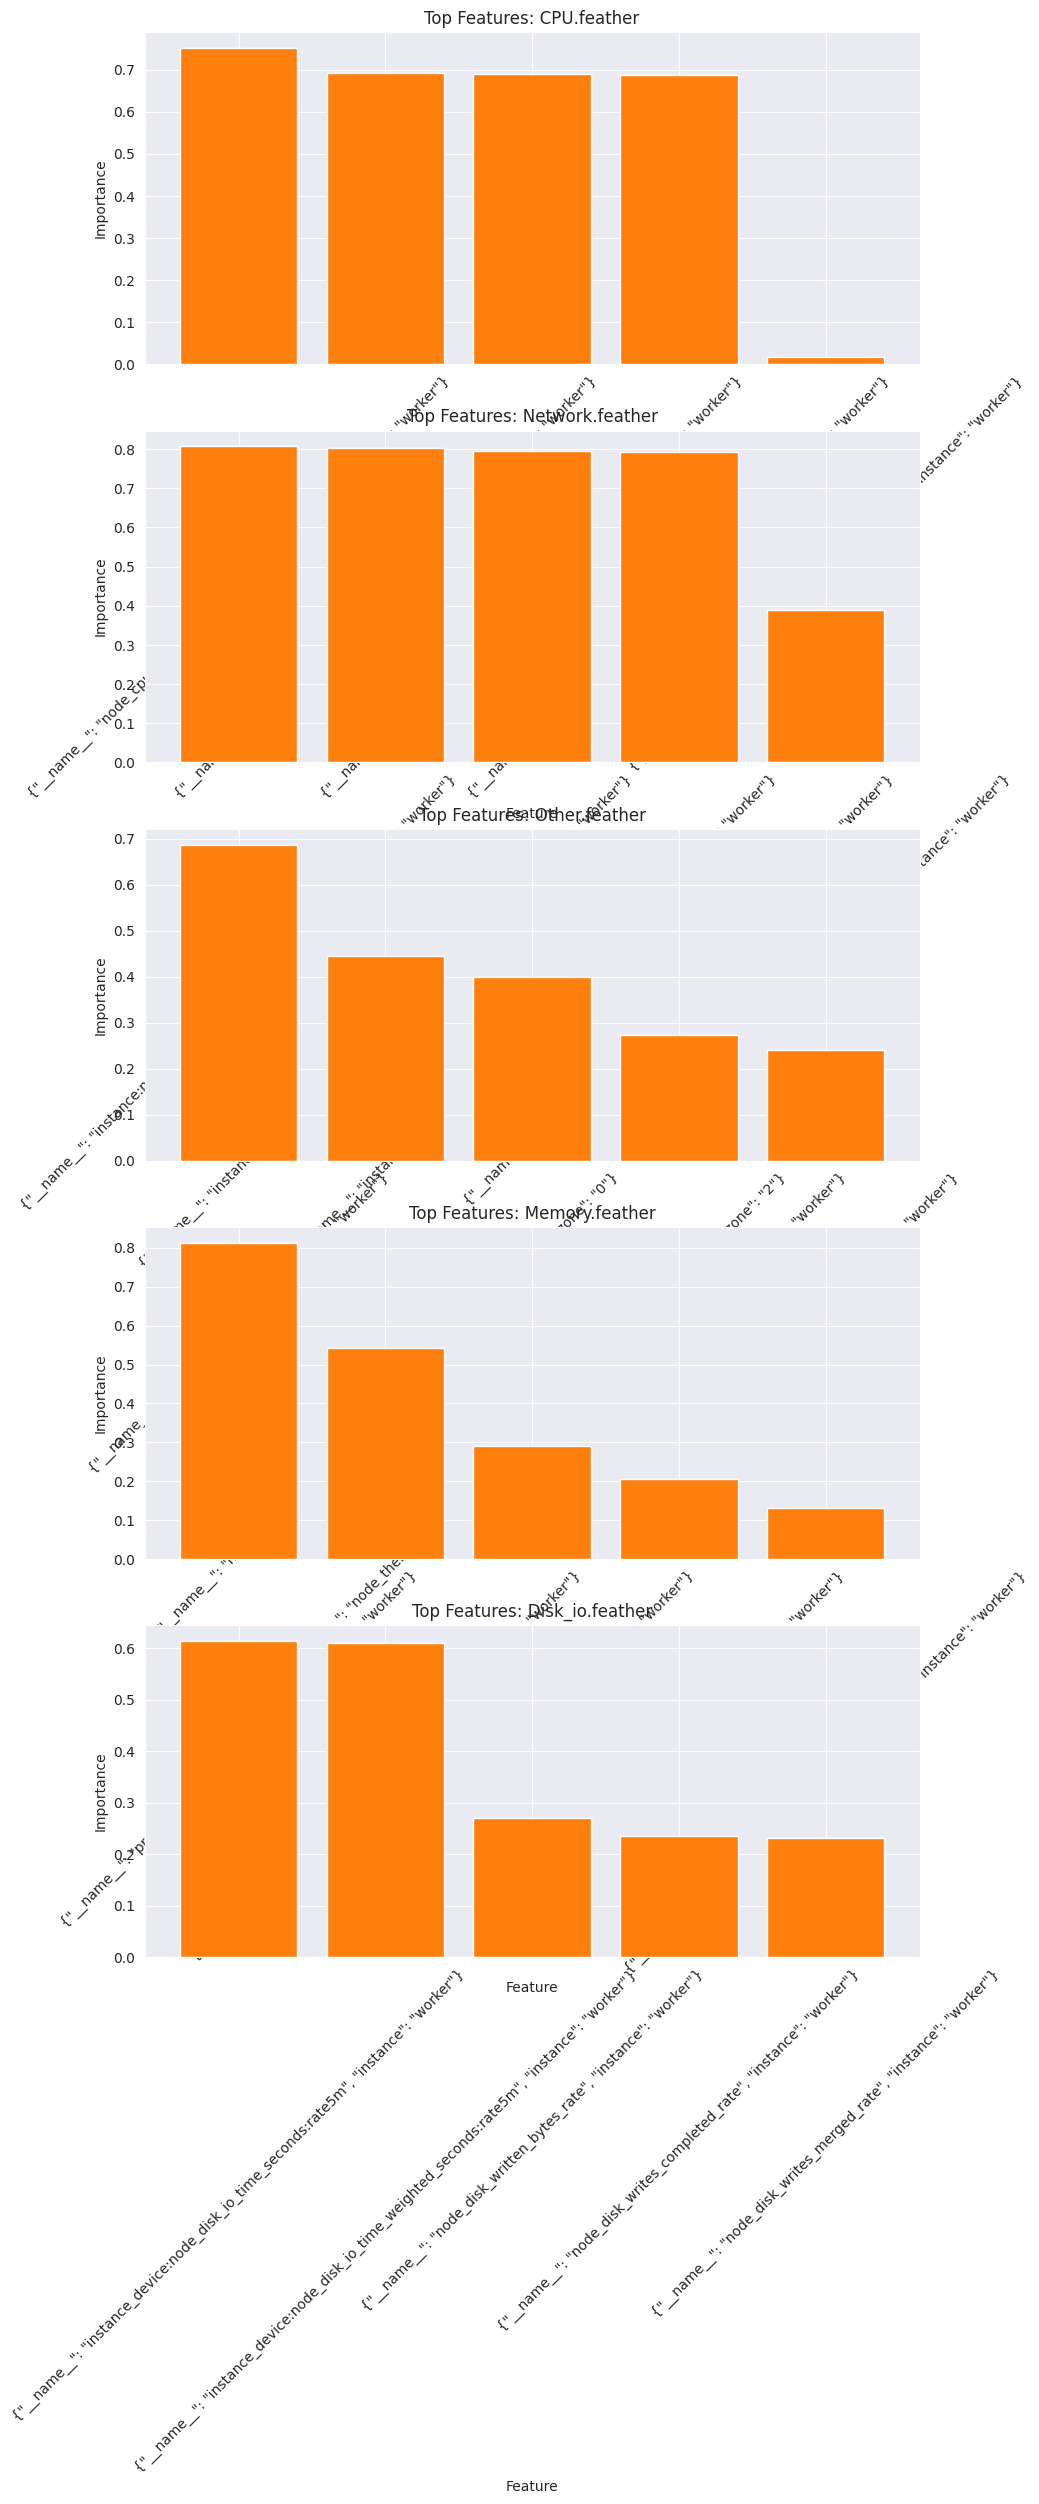

In [9]:
# Create visualization of results
# 1. Performance comparison
summary_df = pd.DataFrame([
    {"Dataset": res["dataset"], "Performance": res["performance"]}
    for res in results.values()
    if "performance" in res
])

plt.figure(figsize=(10, 6))
sns.barplot(data=summary_df, x="Dataset", y="Performance", palette="viridis")
plt.title("Model Performance Across Datasets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Feature importance plots
valid_results = [r for r in results.values() if "top_features" in r]
num_datasets = len(valid_results)
fig, axes = plt.subplots(num_datasets, 1, figsize=(10, 5 * num_datasets))

for i, res in enumerate(valid_results):
    axes[i].bar(res["top_features"], res["feature_importance"])
    axes[i].bar(res["top_features"], res["feature_importance"])
    axes[i].set_title(f"Top Features: {res['dataset']}")
    axes[i].set_xlabel("Feature")
    axes[i].set_ylabel("Importance")
    axes[i].tick_params(axis='x', rotation=45)
    print(res["top_features"])

plt.tight_layout()
plt.show()